# 数据分析

In [1]:
# 导库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 读取数据
data_electronic = pd.read_csv('composition_vs_physical_electronic.csv', header=1)

In [3]:
data_electronic

,model_type,feature_type,cluster,MSE,MAE
0,LR,composition,0,2.720054e+04,8.966000e+01
1,DT,composition,0,9.564850e+03,7.490000e+00
2,RF,composition,0,4.687962e+04,1.717000e+01
3,NN,composition,0,2.485330e+04,1.368000e+01
4,LR,physical,0,1.029730e+04,3.885000e+01
5,DT,physical,0,8.845800e+03,7.020000e+00
6,RF,physical,0,6.597062e+04,2.137000e+01
7,NN,physical,0,1.967319e+04,2.211000e+01
8,LR,composition,1,3.848600e+20,4.370367e+08
9,DT,composition,1,9.180800e+03,6.240000e+00


## 查看各个模型的MSE, MAE

- 未进行聚类前

In [14]:
df1 = data_electronic[(data_electronic['cluster'] == 0)]
df1

,model_type,feature_type,cluster,MSE,MAE
0,LR,composition,0,27200.54,89.66
1,DT,composition,0,9564.85,7.49
2,RF,composition,0,46879.62,17.17
3,NN,composition,0,24853.30,13.68
4,LR,physical,0,10297.30,38.85
5,DT,physical,0,8845.80,7.02
6,RF,physical,0,65970.62,21.37
7,NN,physical,0,19673.19,22.11


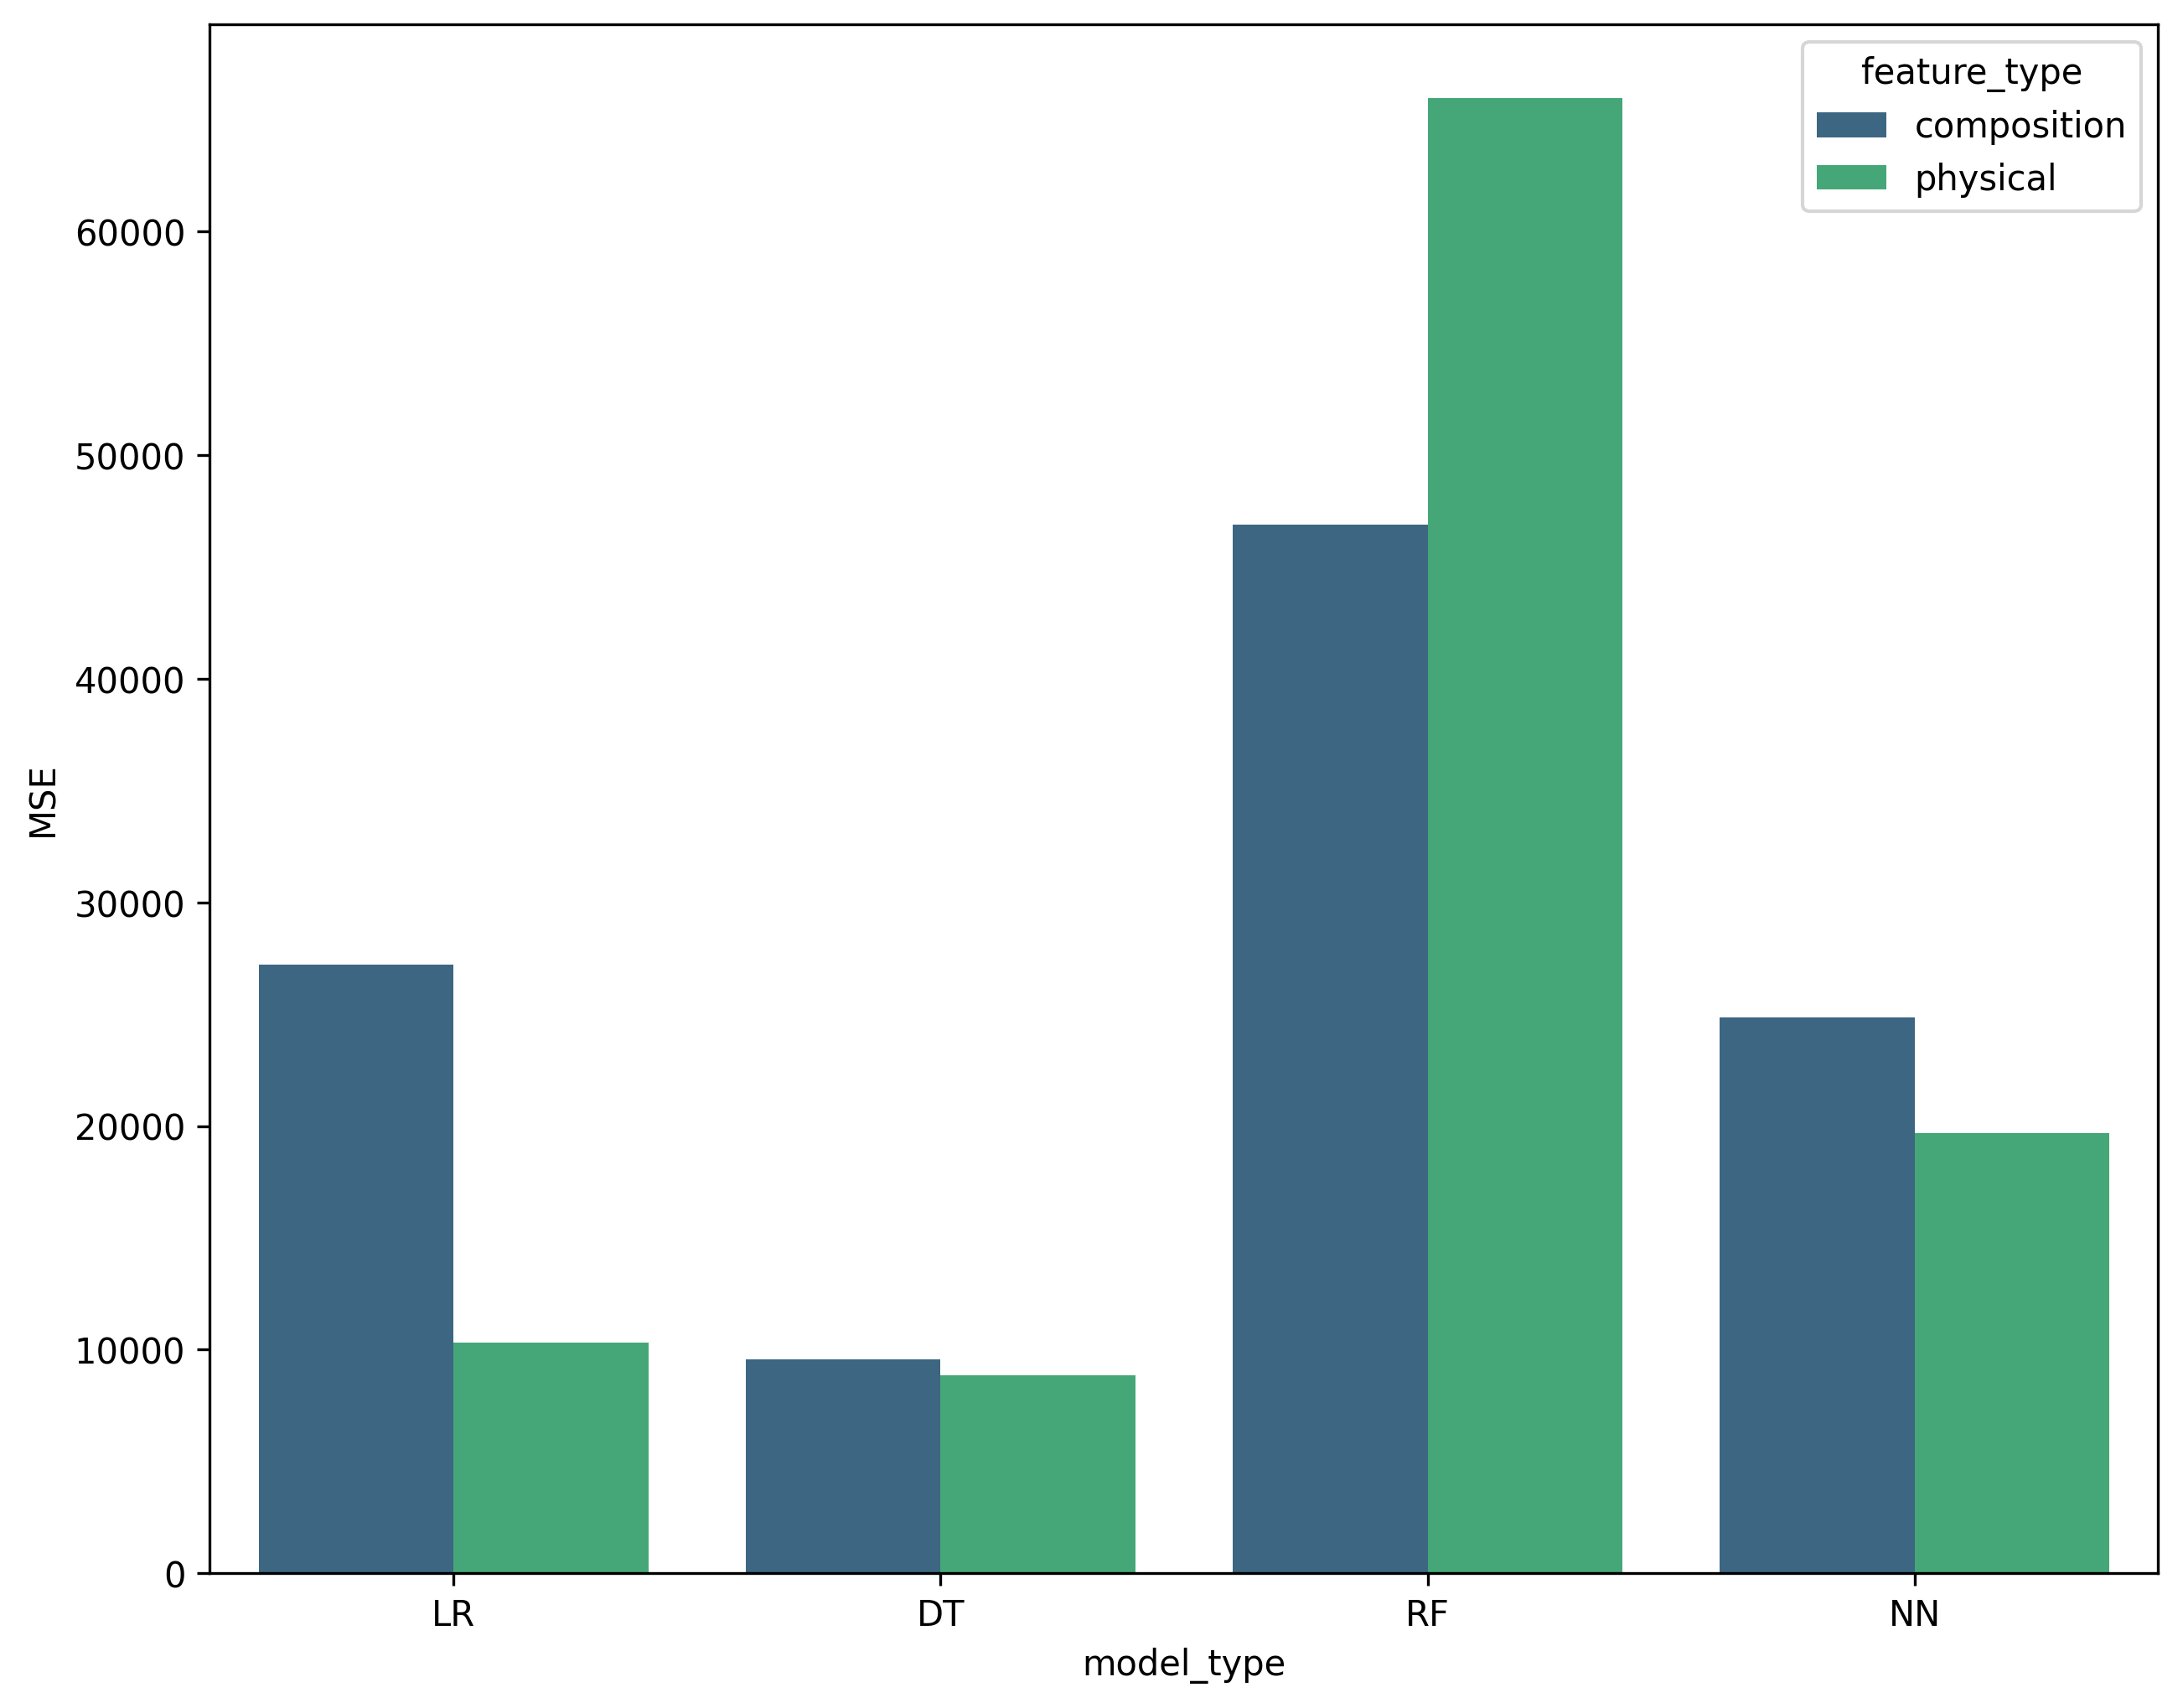

In [15]:
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MSE', data=df1, palette='viridis', hue='feature_type');

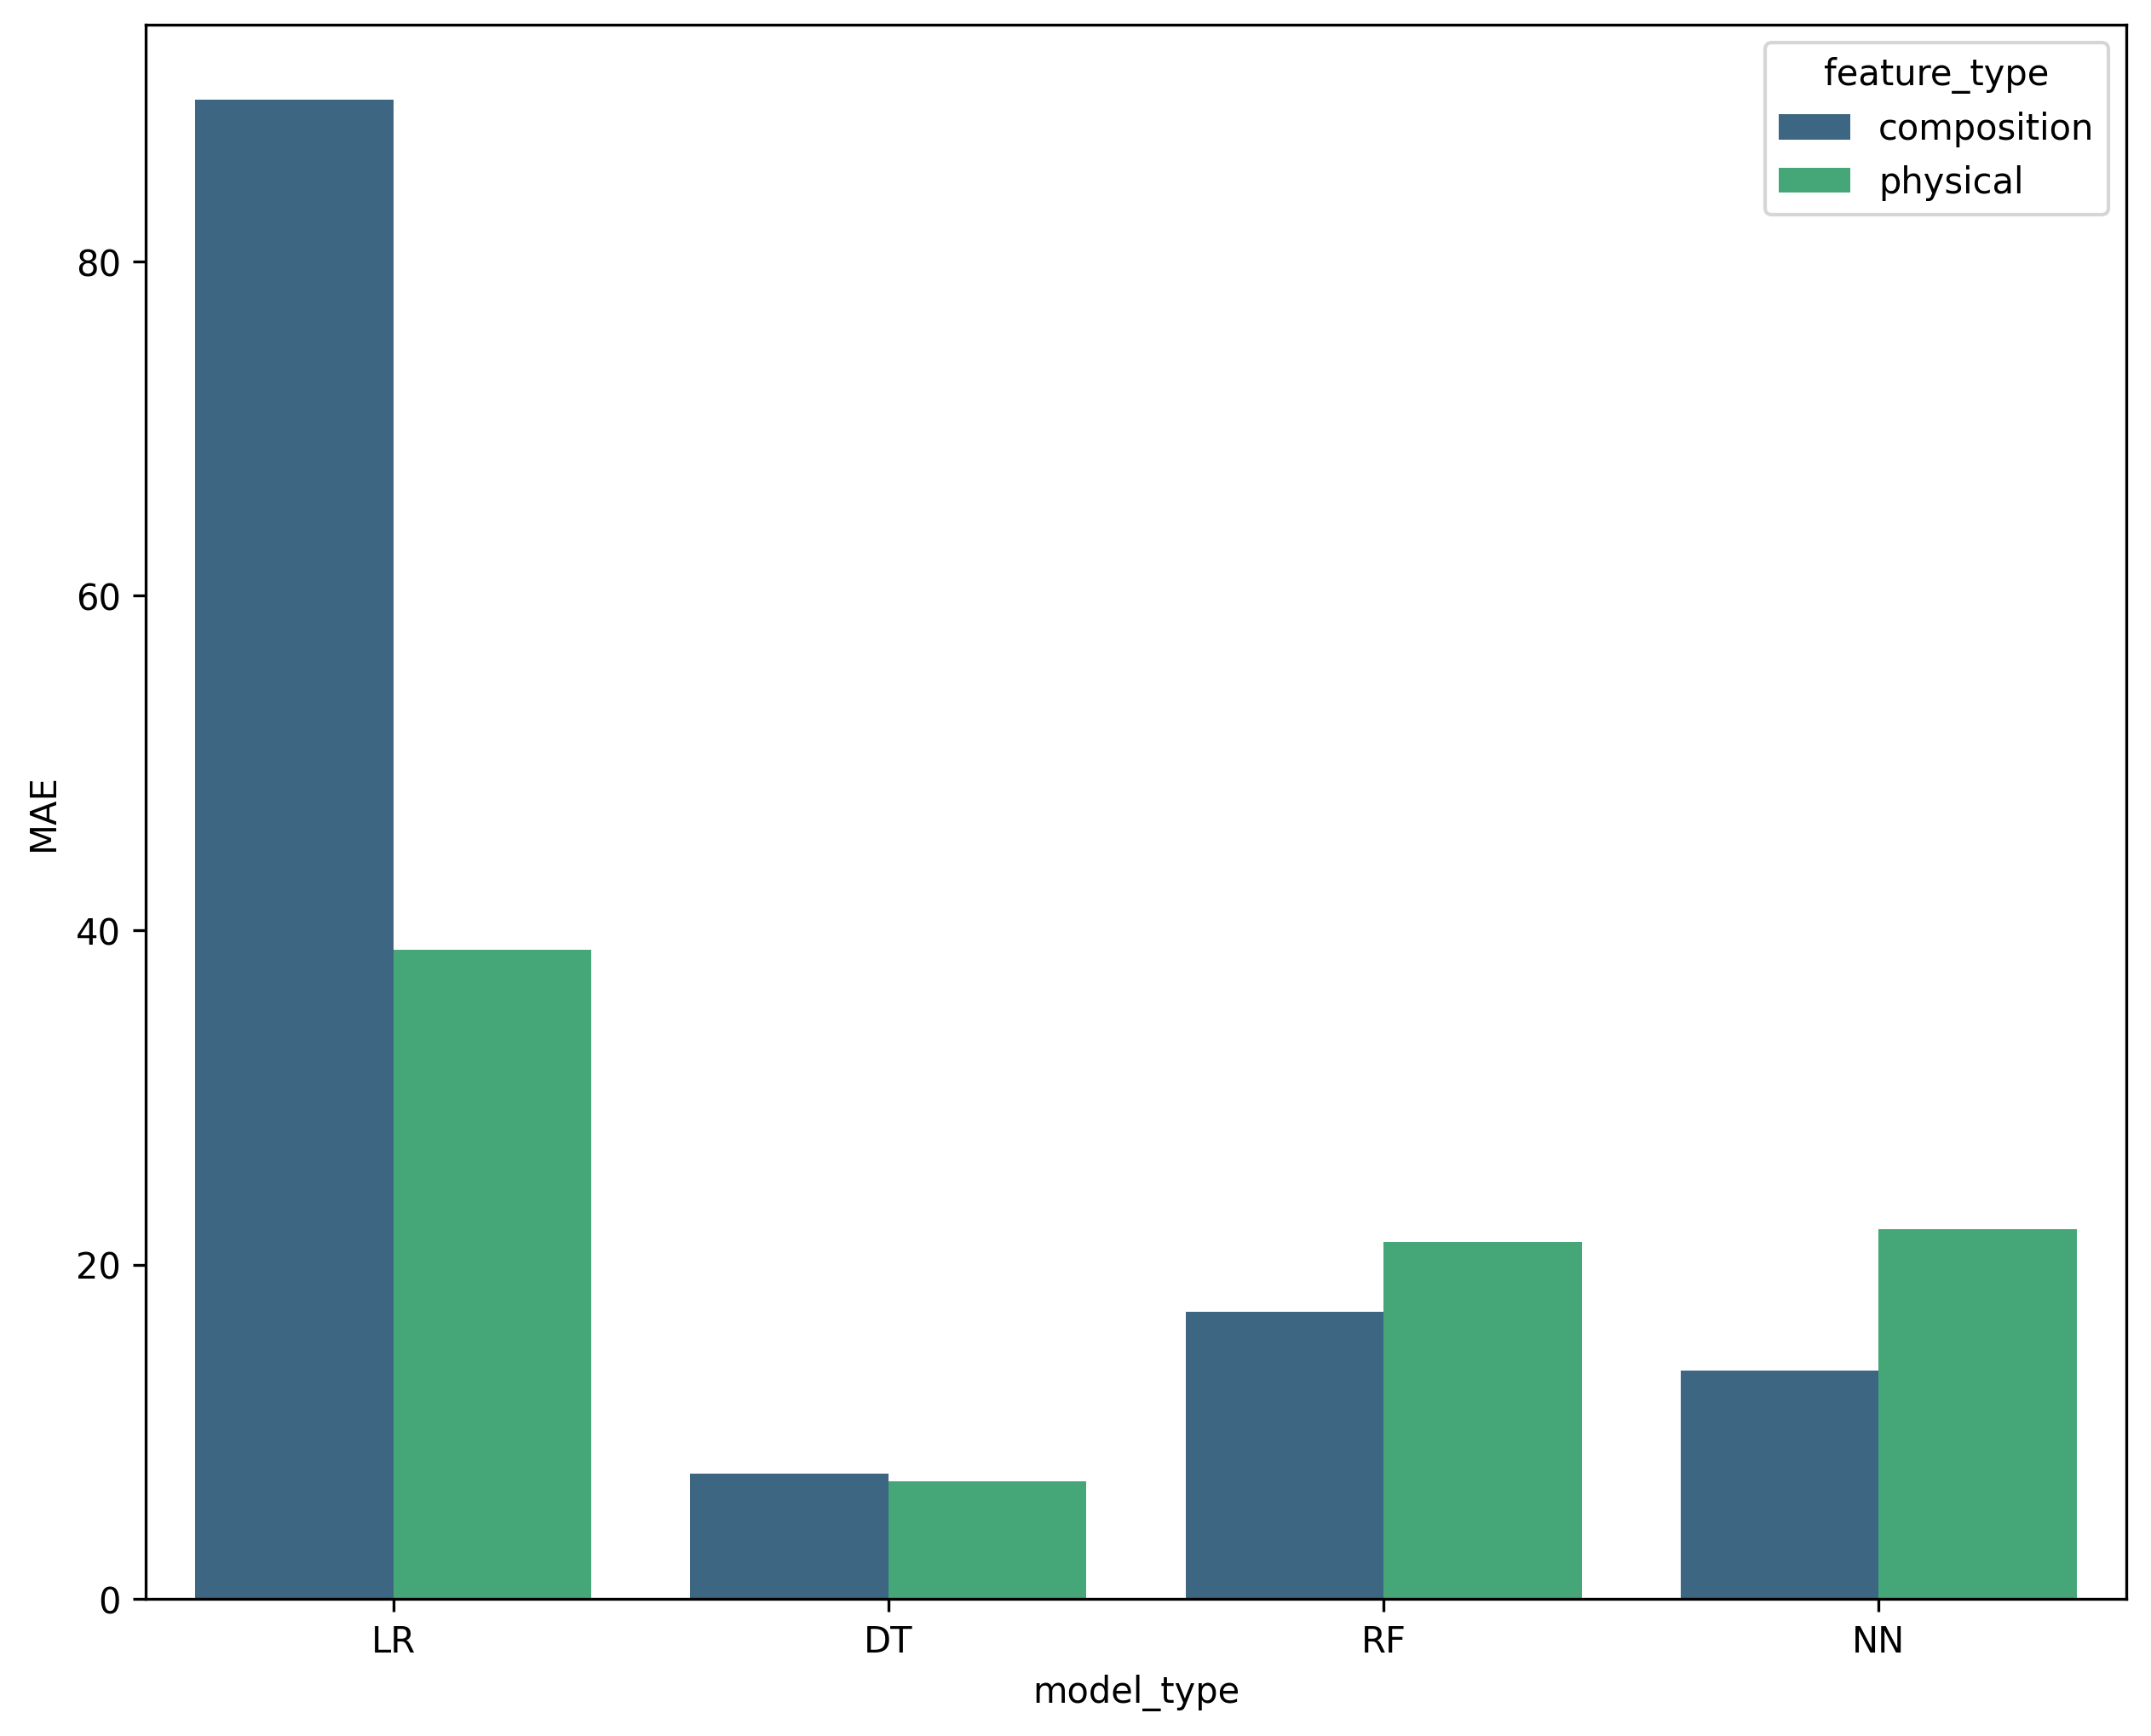

In [16]:
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MAE', data=df1, palette='viridis', hue='feature_type');

- 进行聚类后

In [17]:
df1 = data_electronic[(data_electronic['cluster'] == 1)]
df1

,model_type,feature_type,cluster,MSE,MAE
8,LR,composition,1,3.848600e+20,4.370367e+08
9,DT,composition,1,9.180800e+03,6.240000e+00
10,RF,composition,1,8.733670e+03,6.040000e+00
11,NN,composition,1,2.908421e+05,1.857000e+01
12,LR,physical,1,5.261000e+01,2.330000e+00
13,DT,physical,1,5.029000e+01,1.960000e+00
14,RF,physical,1,3.934000e+01,1.600000e+00
15,NN,physical,1,1.549600e+02,7.050000e+00


(0.0, 1000.0)

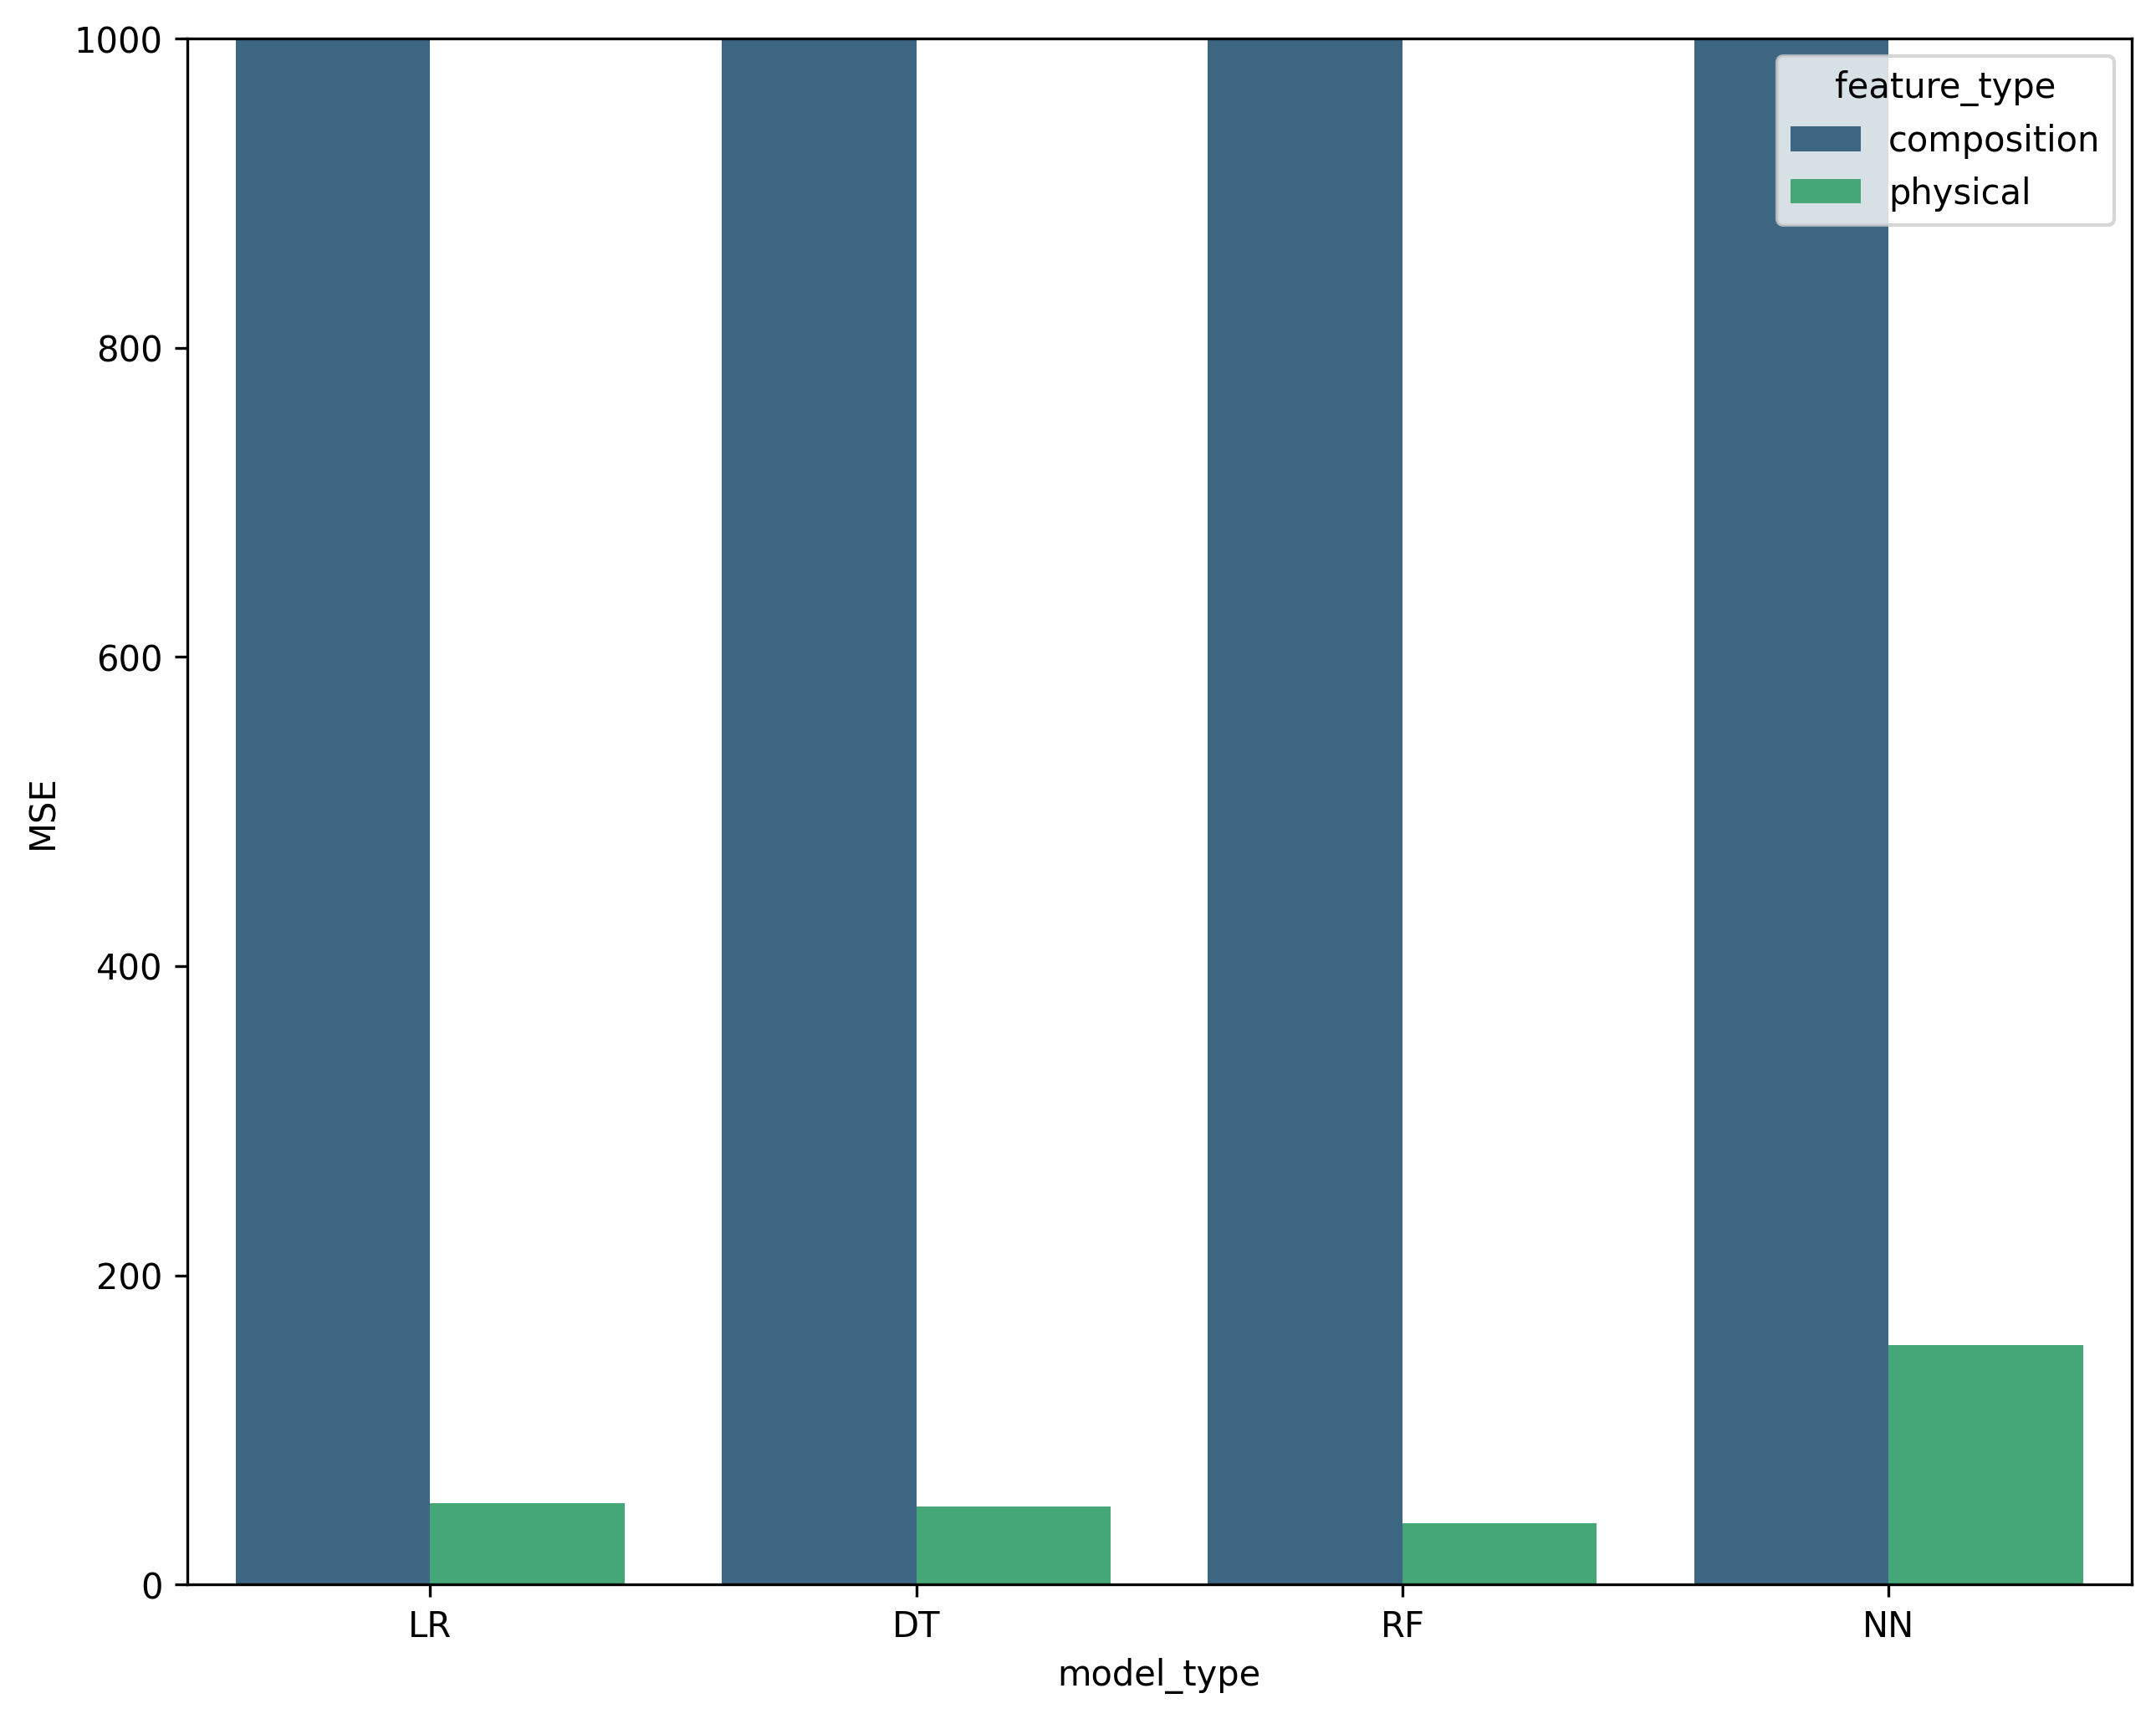

In [21]:
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MSE', data=df1, palette='viridis', hue='feature_type');
plt.ylim(0, 1000)

(0.0, 30.0)

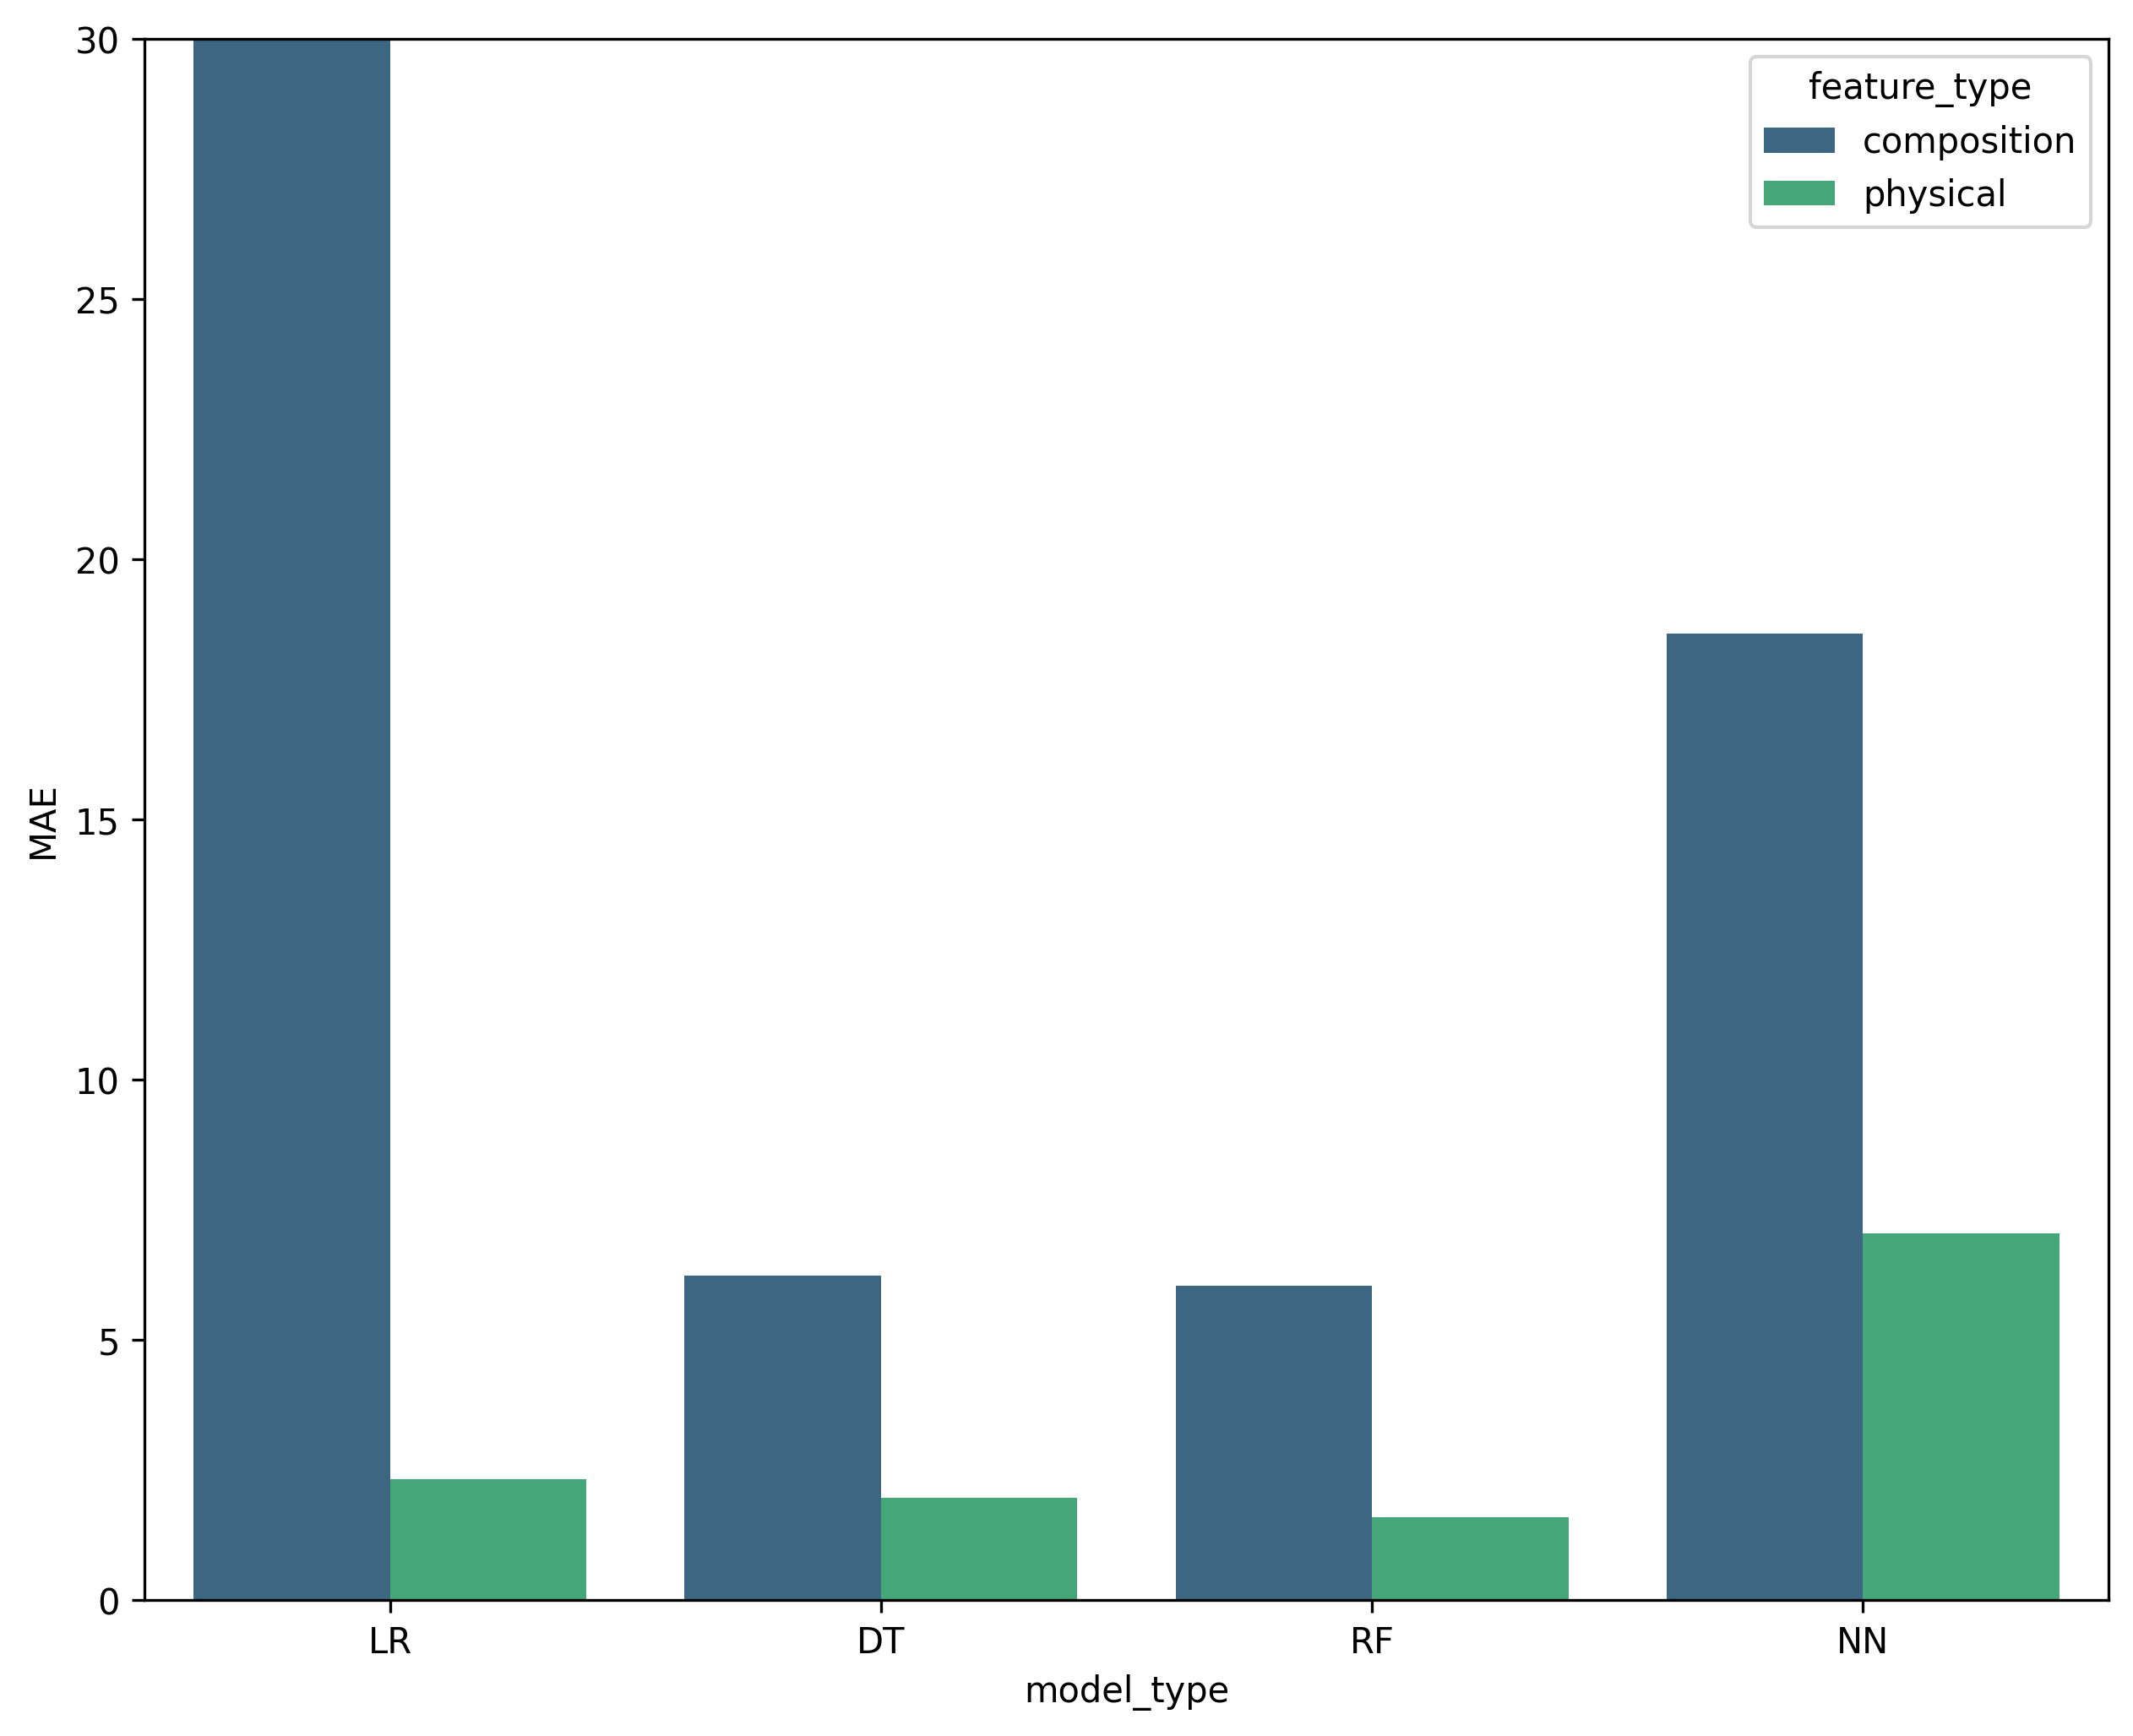

In [23]:
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MAE', data=df1, palette='viridis', hue='feature_type');
plt.ylim(0, 30)

- **可见经过聚类后，模型的MSE, MAE有非常大的下降**

- **且具有领域知识特征的模型要比纯magpie组分模型要好**

## 查看e_electronic, e_ionic, e_total的MSE, MAE

In [24]:
data_ionic = pd.read_csv('composition_vs_physical_ionic.csv', header=1)
data_total = pd.read_csv('composition_vs_physical_total.csv', header=1)

In [25]:
data_ionic.head()

,model_type,feature_type,cluster,MSE,MAE
0,LR,composition,0,7.332999e+06,81.33
1,DT,composition,0,7.335899e+06,68.99
2,RF,composition,0,7.338417e+06,70.41
3,NN,composition,0,7.351694e+08,72.03
4,LR,physical,0,7.333907e+06,71.85


In [27]:
data_total.head()

,model_type,feature_type,cluster,MSE,MAE
0,LR,composition,0,7341445.44,170.33
1,DT,composition,0,7344769.65,74.09
2,RF,composition,0,7408782.68,89.60
3,NN,composition,0,7363468.07,80.73
4,LR,physical,0,7333806.15,105.56


In [28]:
data_electronic['e_type'] = 'electronic'
data_ionic['e_type'] = 'ionic'
data_total['e_type'] = 'total'

In [29]:
total_result = pd.concat([data_electronic, data_ionic, data_total])
total_result

,model_type,feature_type,cluster,MSE,MAE,e_type
0,LR,composition,0,2.720054e+04,8.966000e+01,electronic
1,DT,composition,0,9.564850e+03,7.490000e+00,electronic
2,RF,composition,0,4.687962e+04,1.717000e+01,electronic
3,NN,composition,0,2.485330e+04,1.368000e+01,electronic
4,LR,physical,0,1.029730e+04,3.885000e+01,electronic
5,DT,physical,0,8.845800e+03,7.020000e+00,electronic
6,RF,physical,0,6.597062e+04,2.137000e+01,electronic
7,NN,physical,0,1.967319e+04,2.211000e+01,electronic
8,LR,composition,1,3.848600e+20,4.370367e+08,electronic
9,DT,composition,1,9.180800e+03,6.240000e+00,electronic


In [30]:
# 保存total_result
total_result.to_csv('total_result.csv', index=False)

- 未经过聚类前

(0.0, 100000.0)

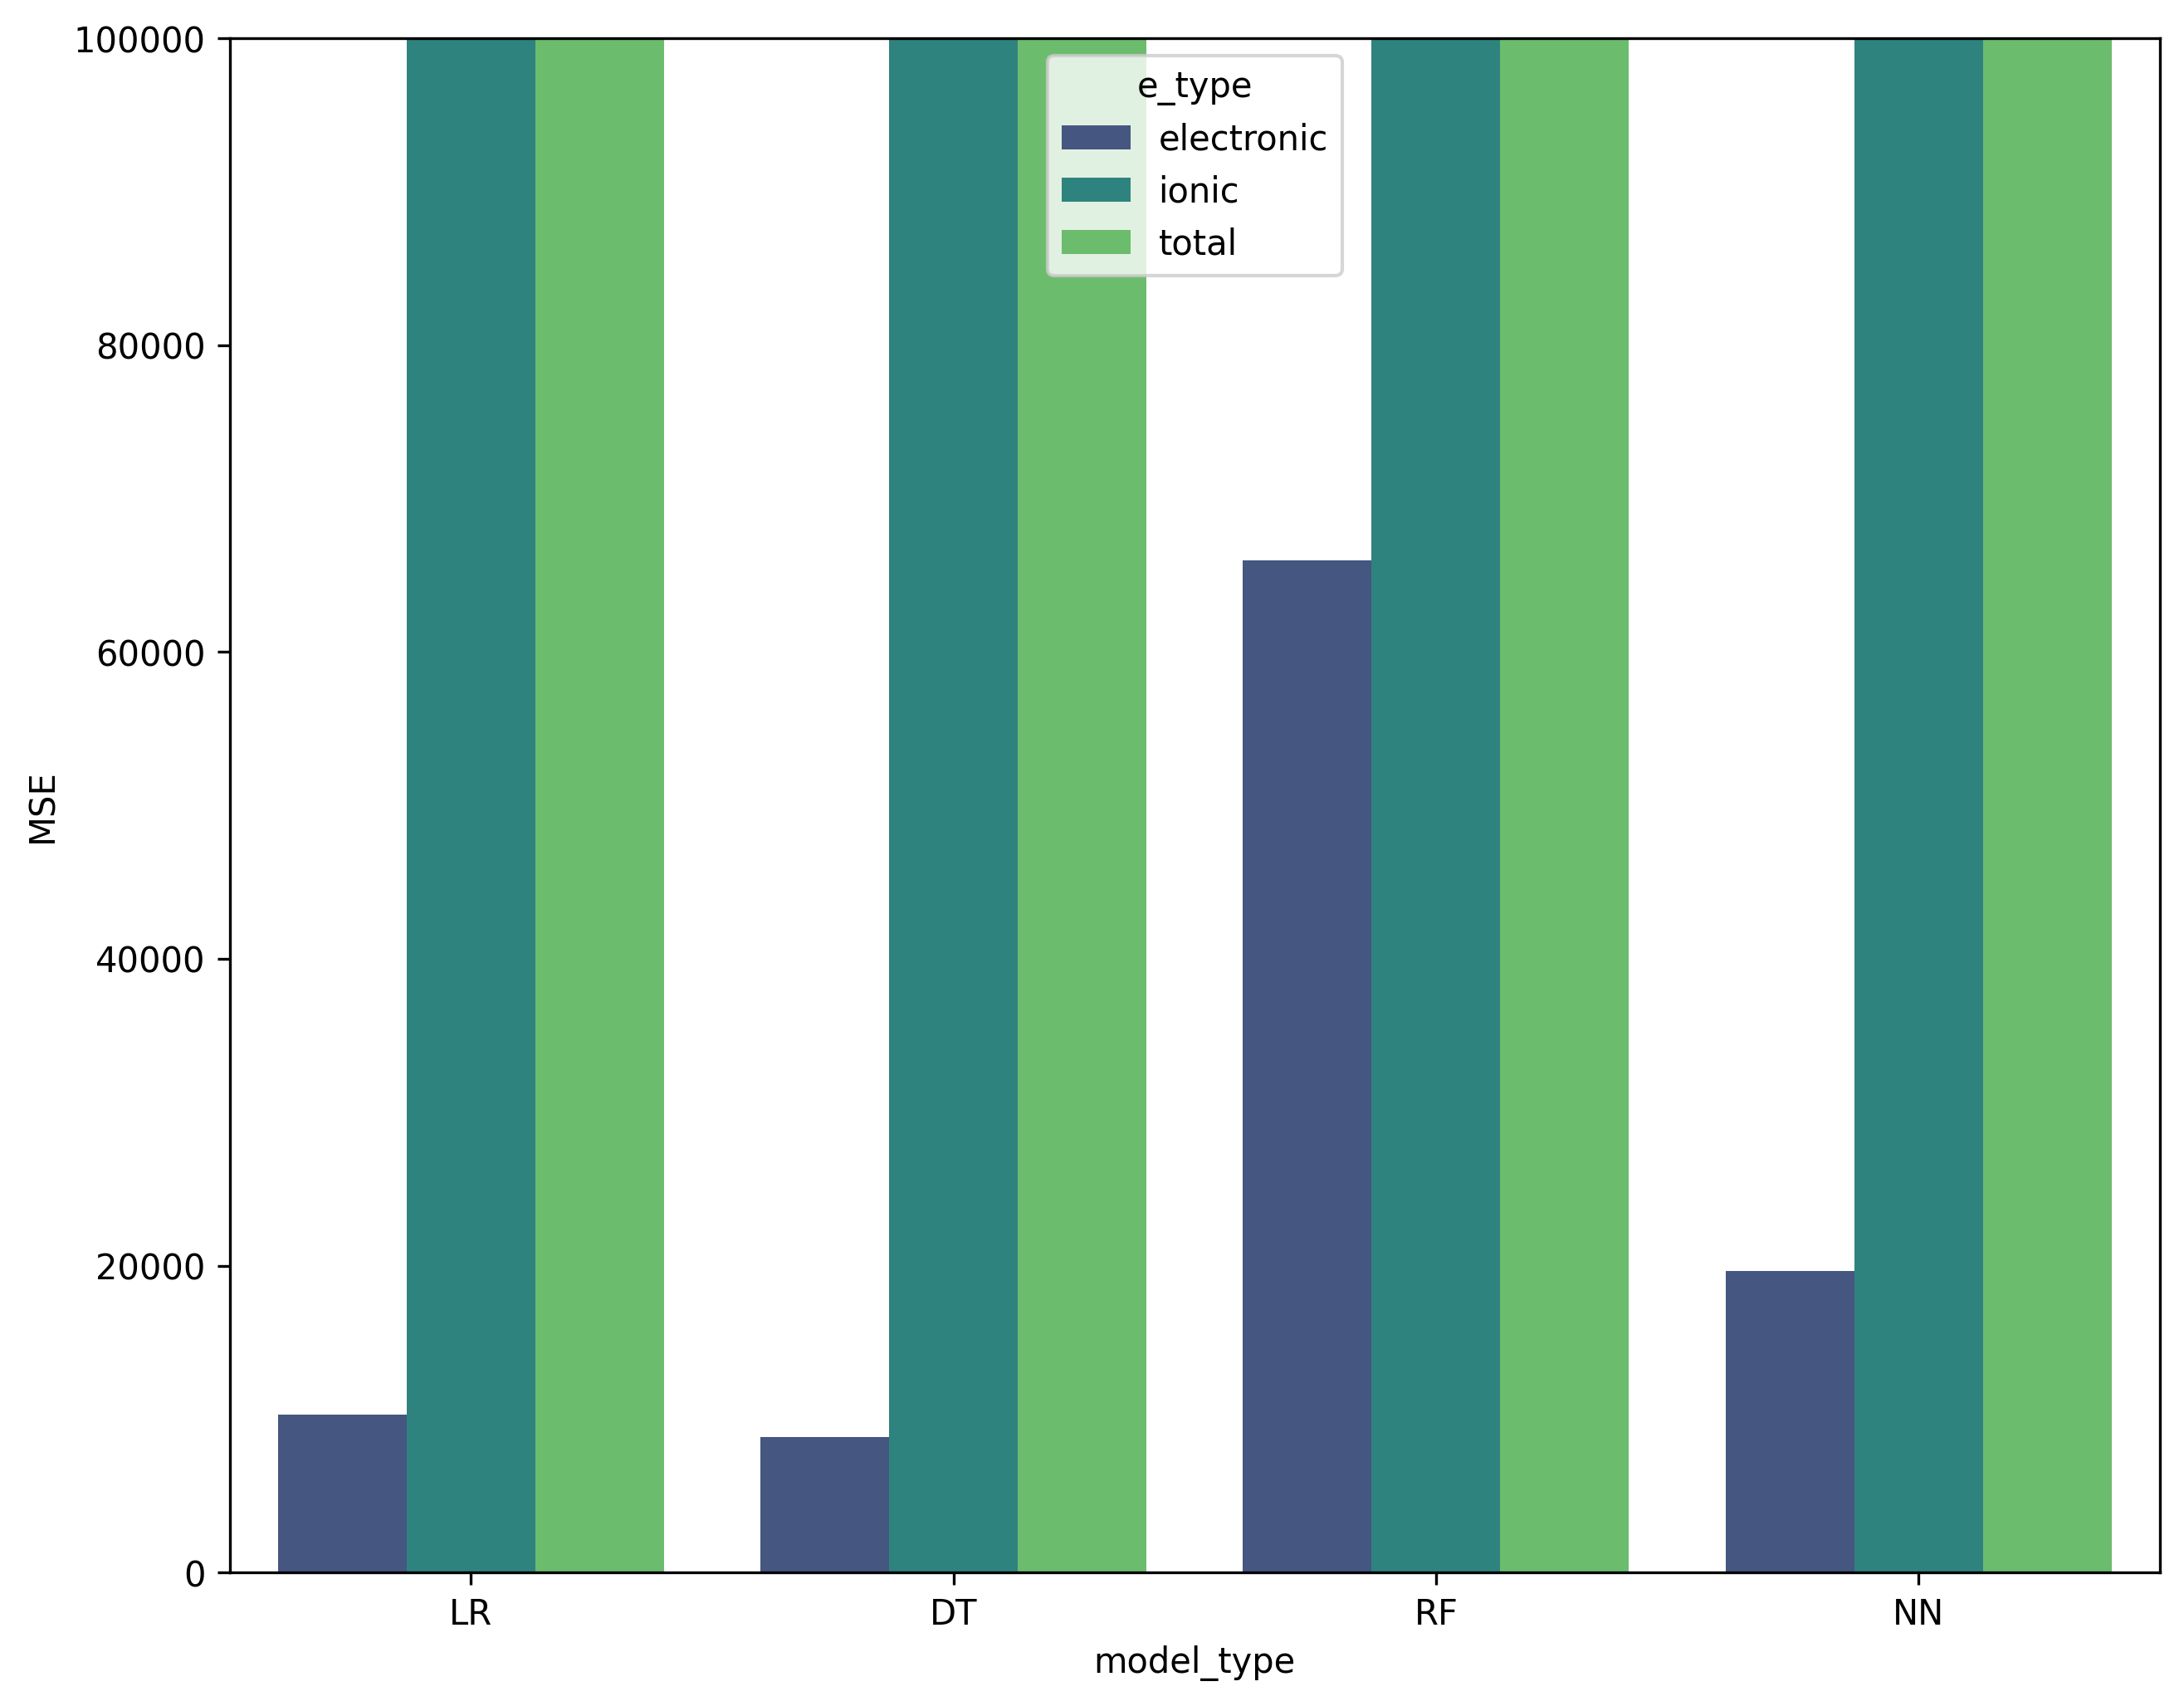

In [35]:
df2 = total_result[(total_result['cluster'] == 0) & (total_result['feature_type'] == 'physical')]
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MSE', data=df2, palette='viridis', hue='e_type');
plt.ylim(0, 100000)

(0.0, 100.0)

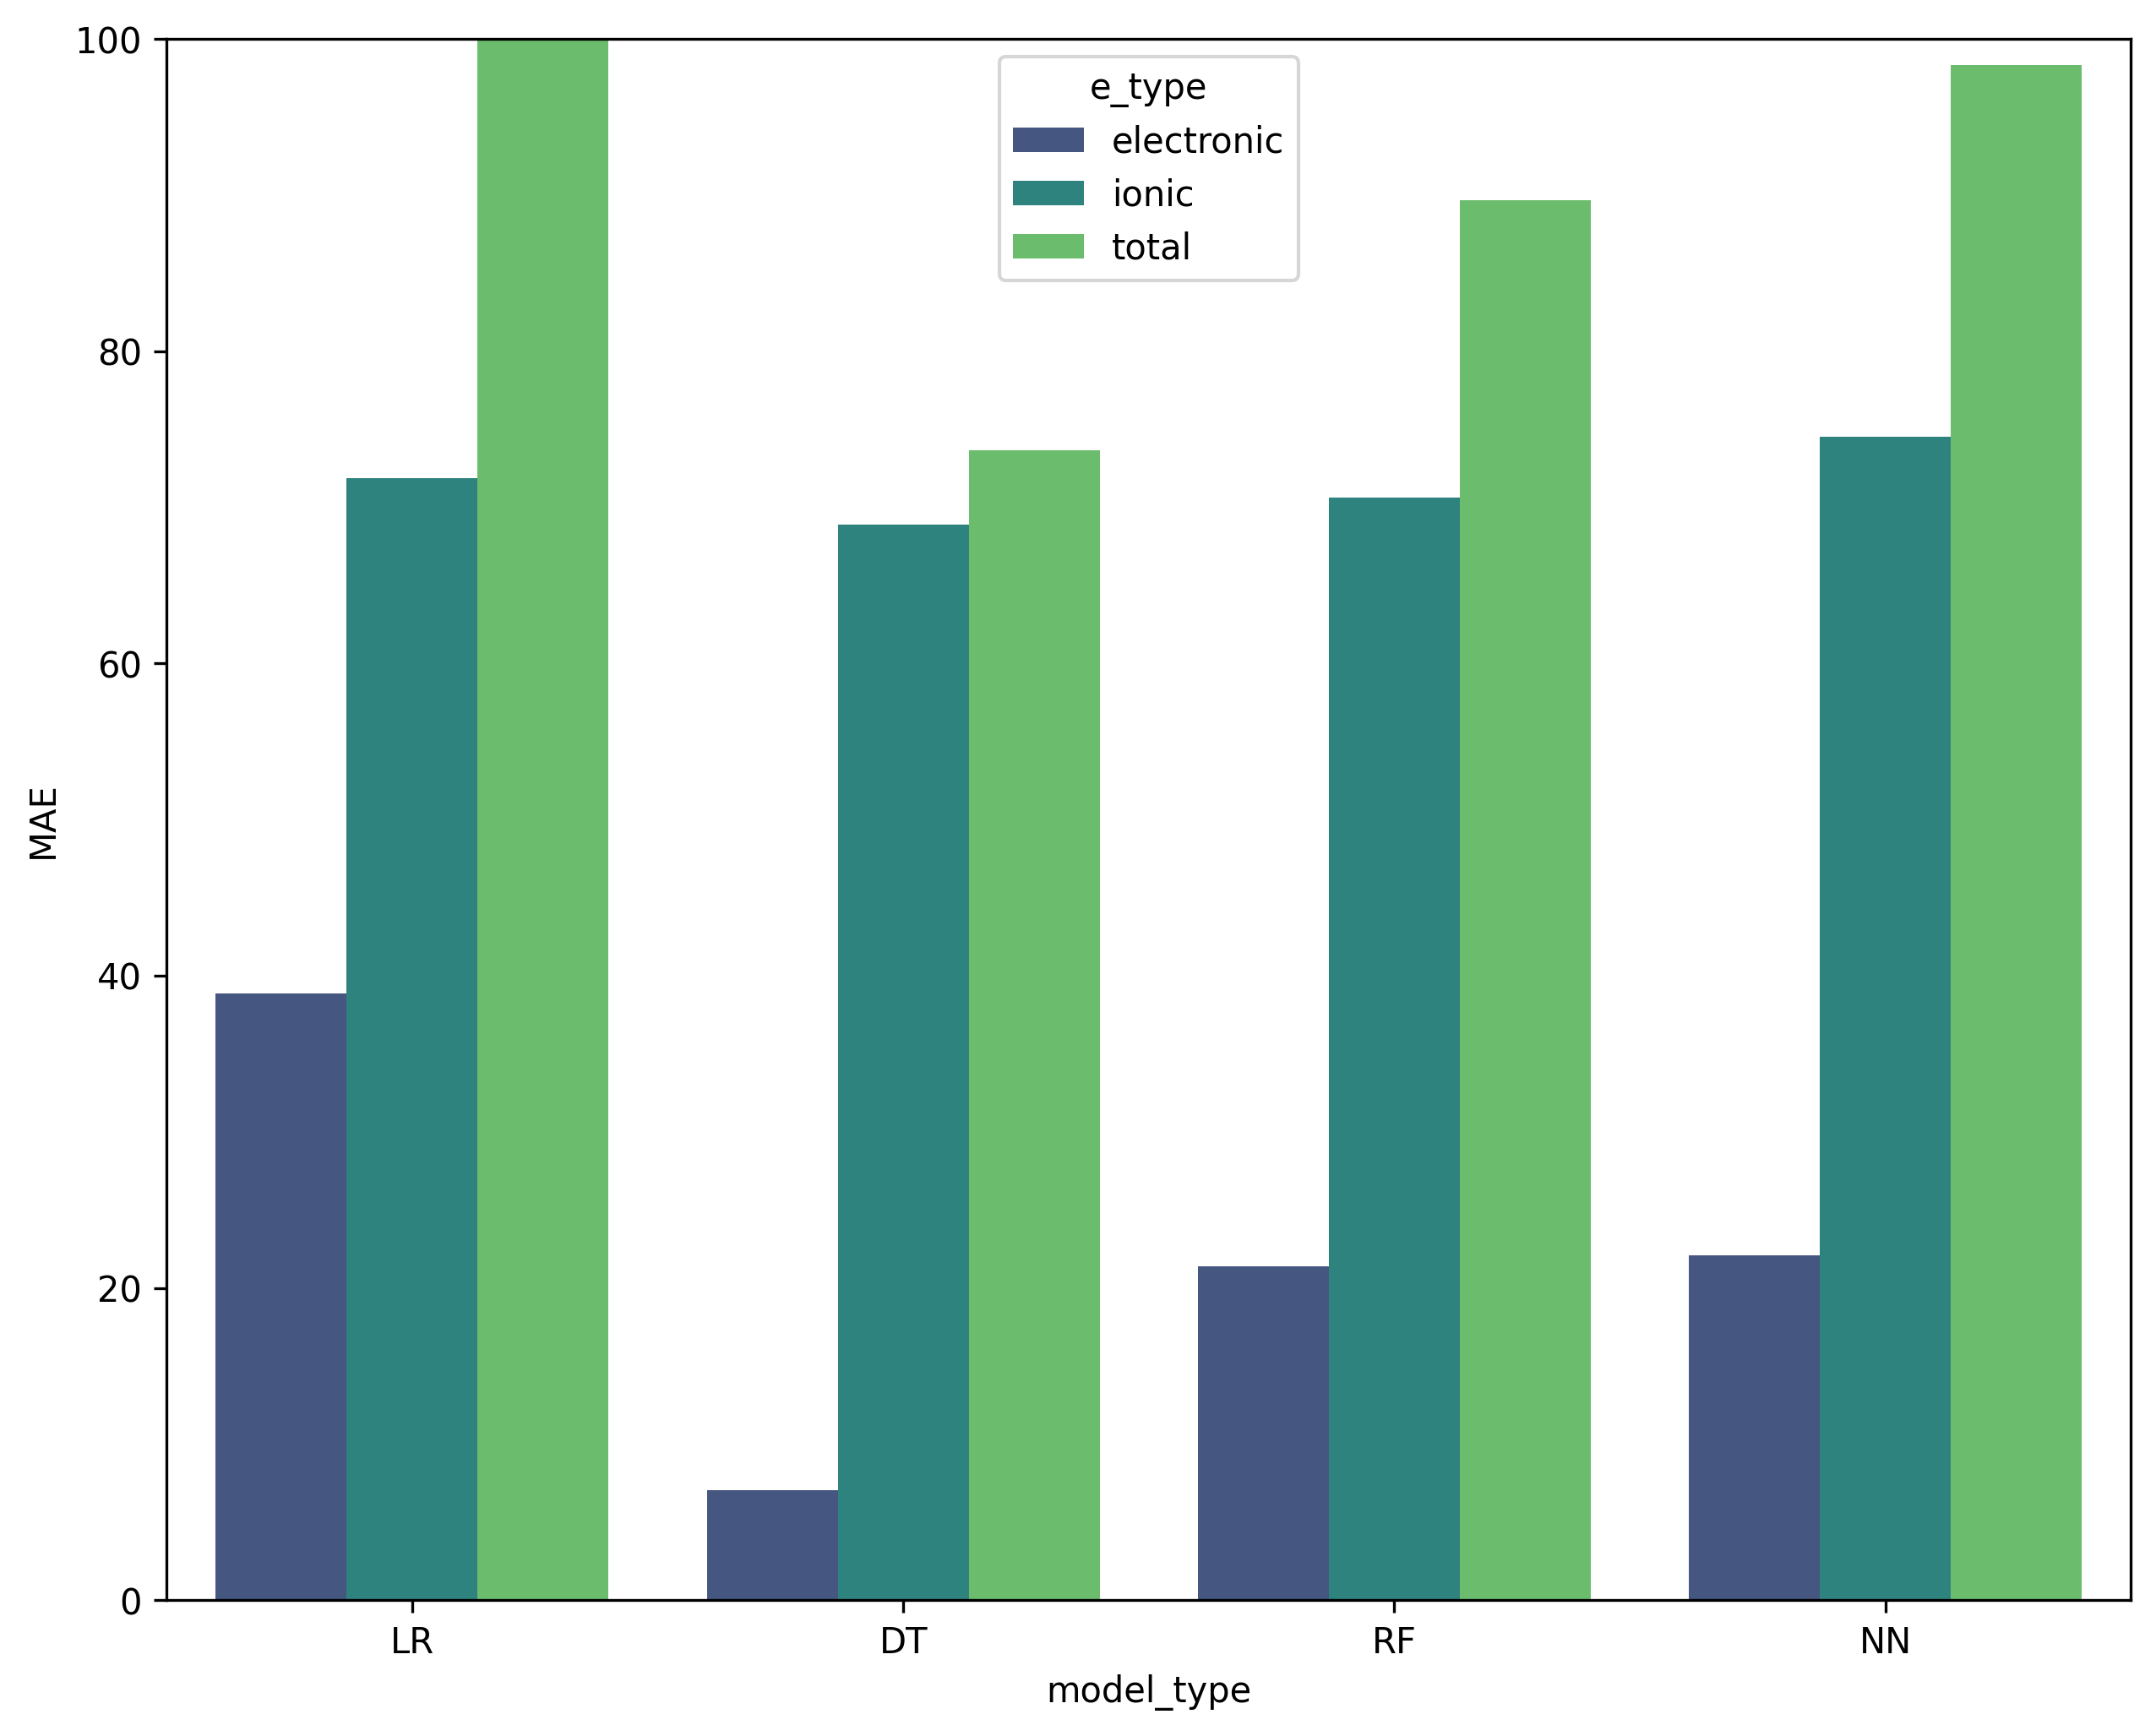

In [36]:
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MAE', data=df2, palette='viridis', hue='e_type');
plt.ylim(0, 100)

- 经过聚类后

(0.0, 300.0)

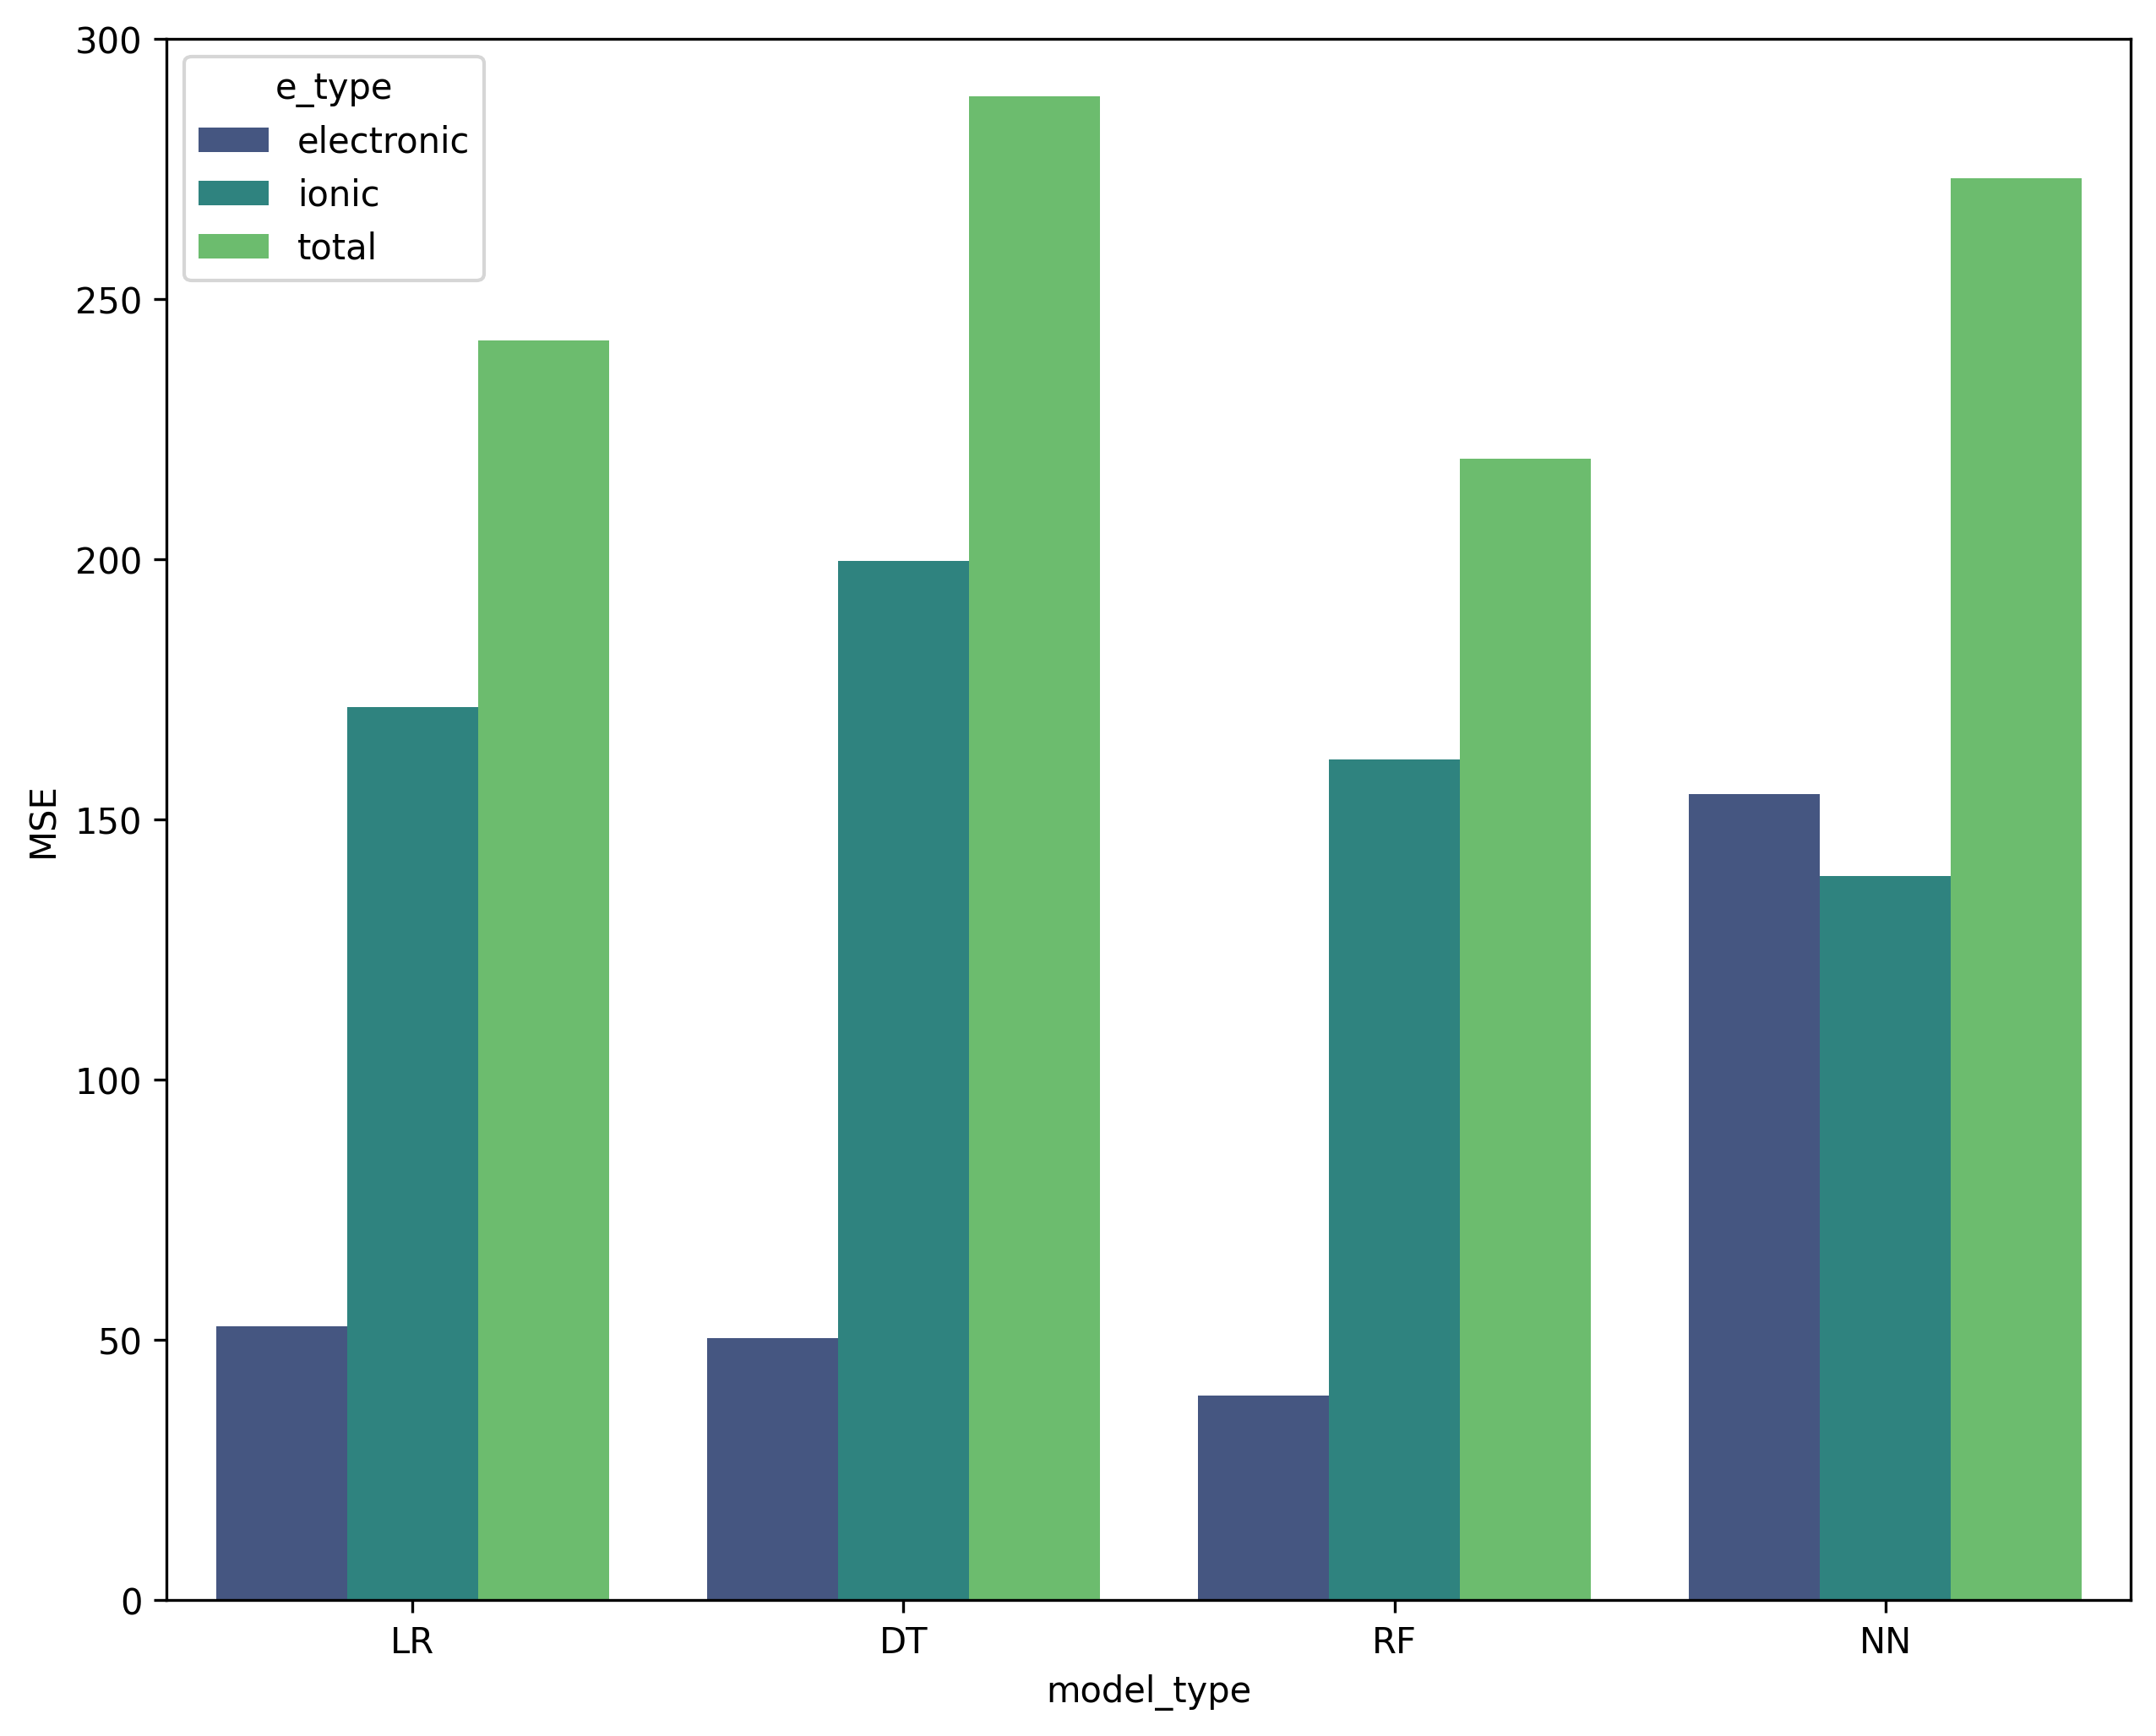

In [42]:
df3 = total_result[(total_result['cluster'] == 1) & (total_result['feature_type'] == 'physical')]
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MSE', data=df3, palette='viridis', hue='e_type');
plt.ylim(0, 300)

(0.0, 10.0)

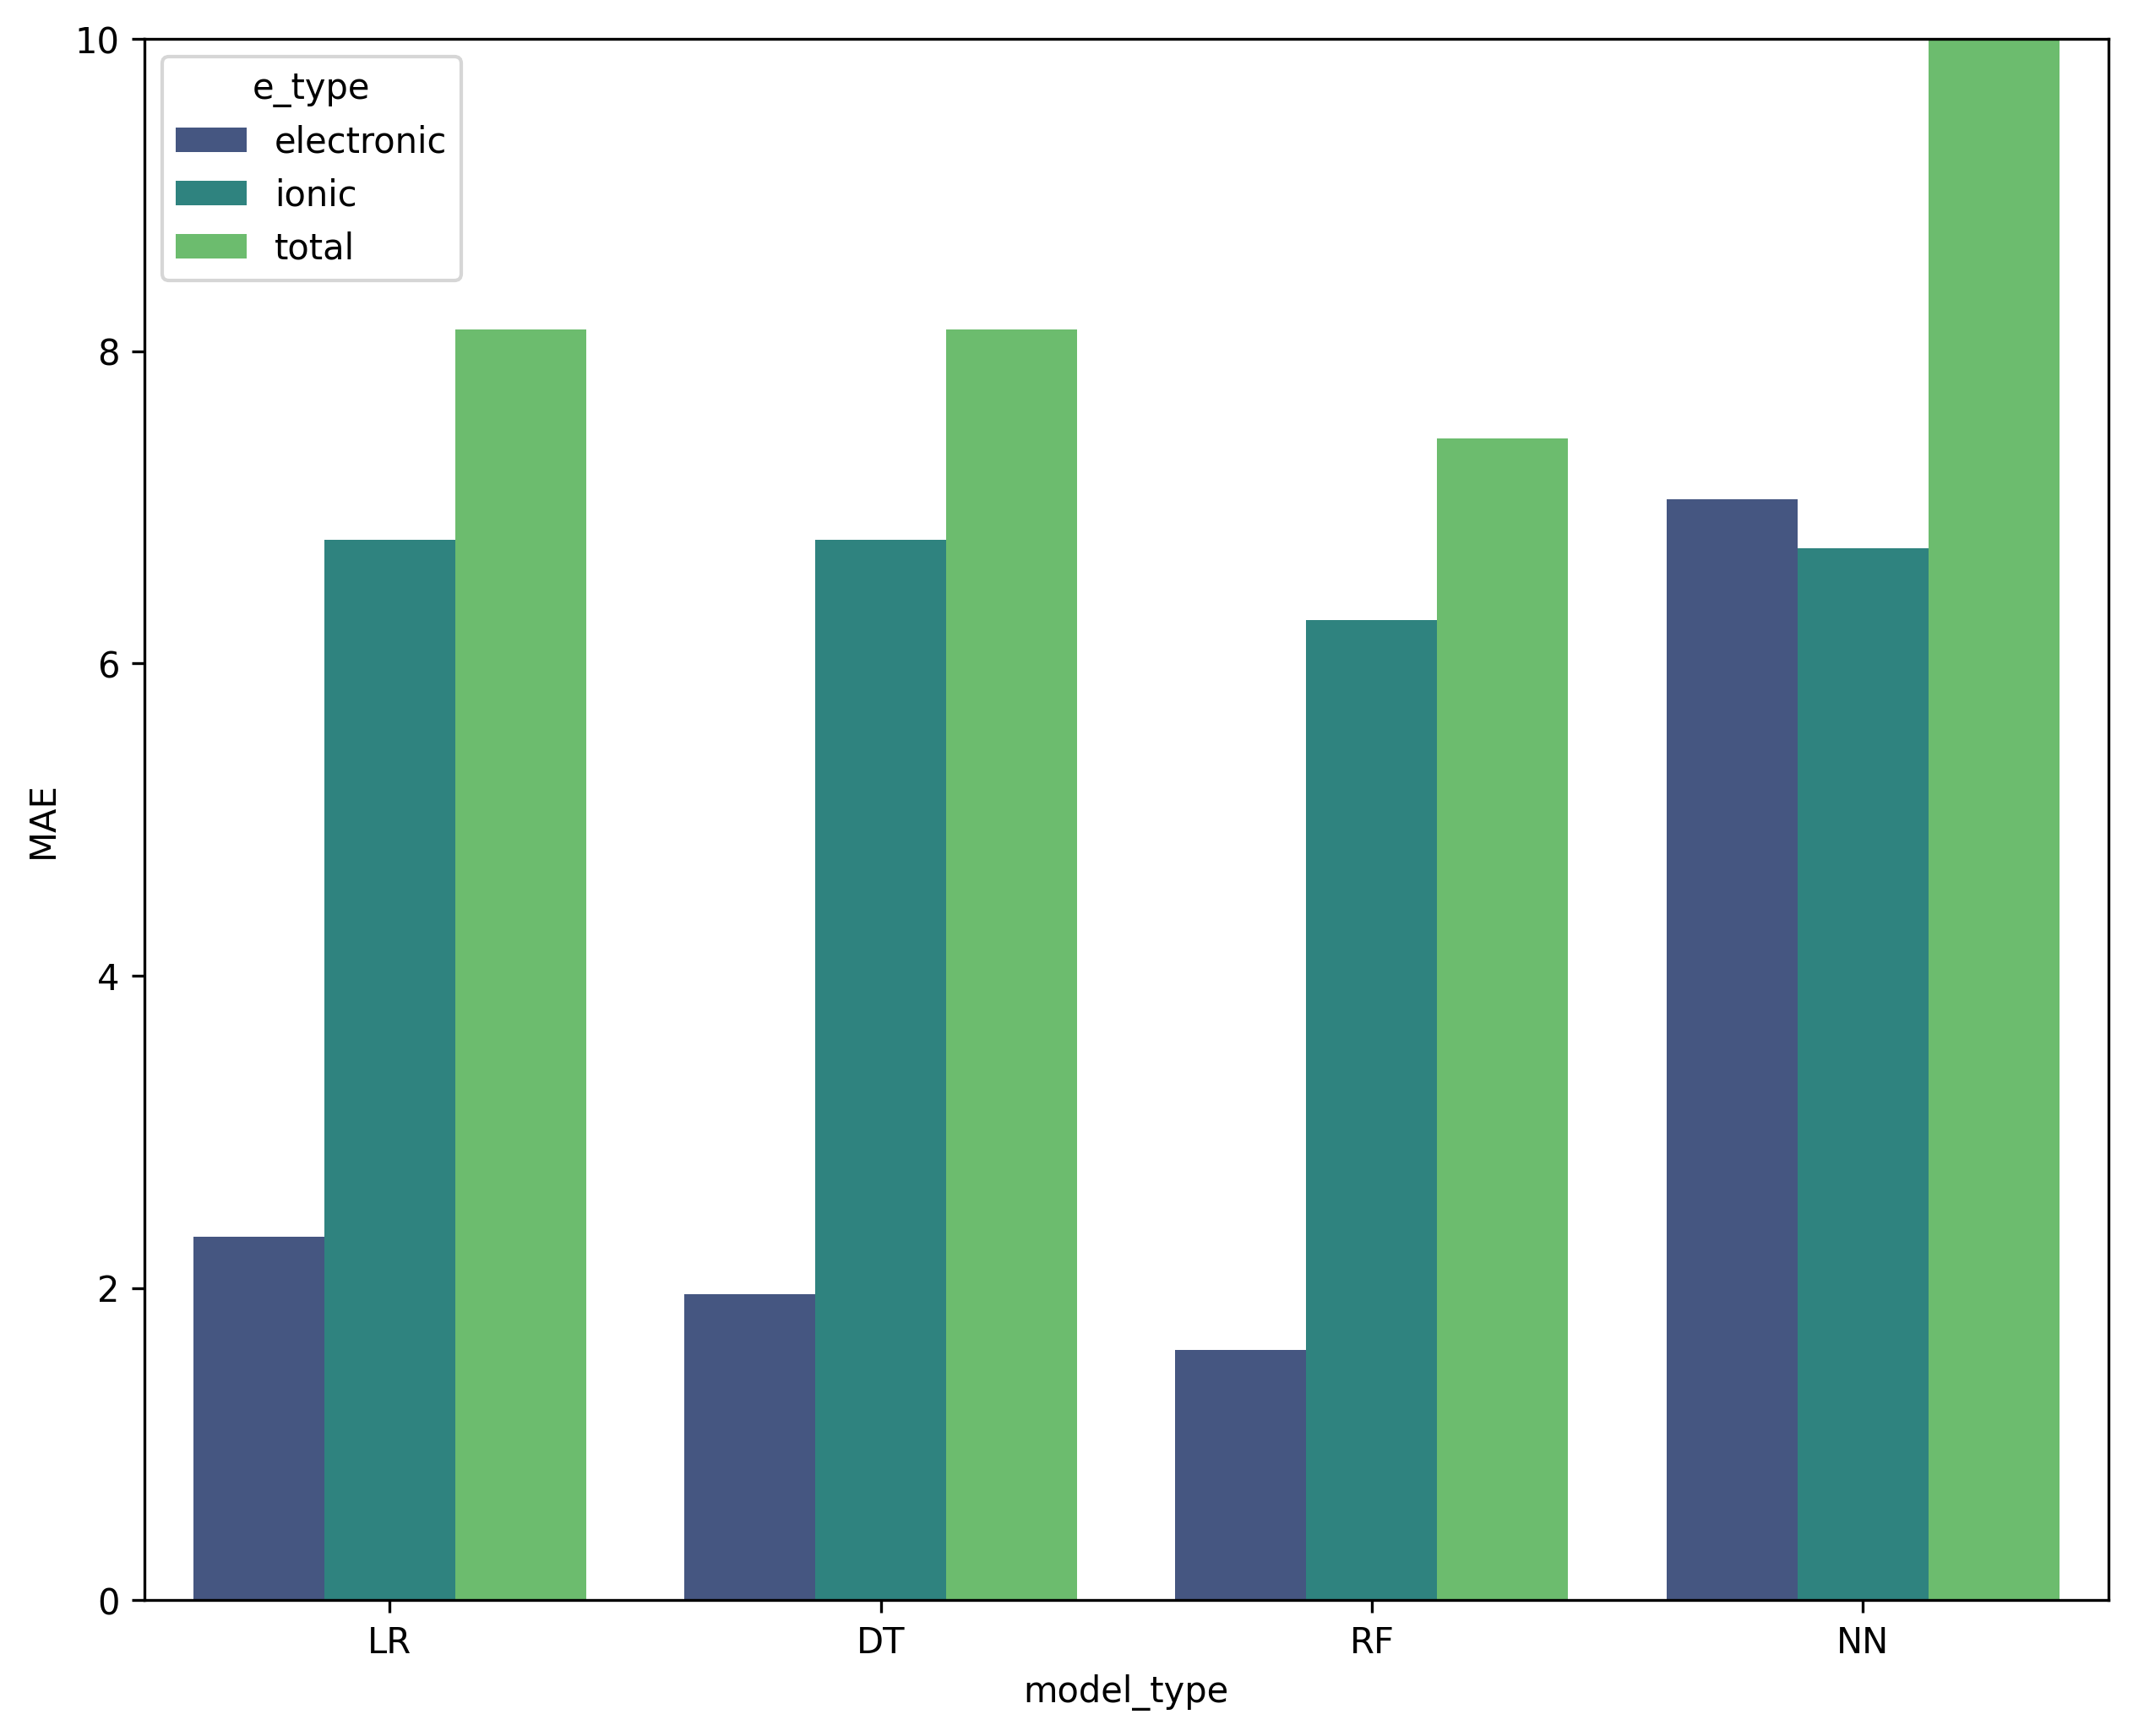

In [43]:
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x='model_type', y='MAE', data=df3, palette='viridis', hue='e_type');
plt.ylim(0, 10)